In [212]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

### データ取得

In [213]:
f_path = './data/two_years.xlsx'
df = pd.read_excel(f_path, header=0)
df.head()

Date  Market  AdvertiserId       AdvertiserName  CampaignId  \
0 2018-01-19  kodate          2914        NextKodate JP      106509   
1 2018-01-19  ryutsu         15911  NextRyutsuUrichi JP      106512   
2 2018-01-19    rent          2773       NextChintai JP      106513   
3 2018-01-19  kodate          2914        NextKodate JP      106510   
4 2018-01-19  ryutsu         15911  NextRyutsuUrichi JP      106512   

                               CampaignName  CategoryId  \
0            kodatejp Full Device - Convert   739735262   
1  nextryutsuurichijp Full Device - Convert  1771391024   
2       nextchintaijp Full Device - Convert   269984294   
3            kodatejp Full Device - Acquire  1363706990   
4  nextryutsuurichijp Full Device - Convert  1093612375   

                 CategoryName  CpcBid  OverallCompetitionWin      ...       \
0                      北海道・東北    15.0               0.022660      ...        
1  大阪市・東大阪市・豊中市・吹田市・枚方市売地＋その他     7.7               0.009585      ...        
2           23区北部（豊島区・北区・板橋区）     9.0               0.015469      ...        
3                       埼玉_戸建    14.0               0.004000      ...        
4                   神奈川売地＋その他     7.7               0.005390      ...        

     SalesRent  SalesRyutsu  SalesSck  SalesMansionBkn  SalesMansionKen  \
0          NaN          NaN       NaN              NaN              NaN   
1          NaN          NaN       NaN              NaN              NaN   
2  7754.758677          0.0       NaN              NaN              NaN   
3          NaN          NaN       NaN              NaN              NaN   
4          NaN          NaN       NaN              NaN              NaN   

   SalesKodateBkn  SalesKodateKen  Impressions  Clicks          Cost  
0             NaN             NaN        28167     160   2699.599920  
1             NaN             NaN         4537      65    845.000000  
2             NaN             NaN        86858    1711  22362.771526  
3             NaN             NaN        12747      91   1212.819960  
4             NaN             NaN        12816     246   3198.000000  

[5 rows x 29 columns]

In [214]:
df['Market'].value_counts()

kodate     35565
mansion    25708
ryutsu     23162
rent       21430
honten     14432
Name: Market, dtype: int64

In [215]:
m = {'kodate': 0, 'mansion': 1, 'ryutsu': 2, 'rent': 3, 'honten': 4}
df.insert(2, 'MarketId', df['Market'].apply(lambda x: m[x]))
df.head()

Date  Market  MarketId  AdvertiserId       AdvertiserName  CampaignId  \
0 2018-01-19  kodate         0          2914        NextKodate JP      106509   
1 2018-01-19  ryutsu         2         15911  NextRyutsuUrichi JP      106512   
2 2018-01-19    rent         3          2773       NextChintai JP      106513   
3 2018-01-19  kodate         0          2914        NextKodate JP      106510   
4 2018-01-19  ryutsu         2         15911  NextRyutsuUrichi JP      106512   

                               CampaignName  CategoryId  \
0            kodatejp Full Device - Convert   739735262   
1  nextryutsuurichijp Full Device - Convert  1771391024   
2       nextchintaijp Full Device - Convert   269984294   
3            kodatejp Full Device - Acquire  1363706990   
4  nextryutsuurichijp Full Device - Convert  1093612375   

                 CategoryName  CpcBid      ...         SalesRent  SalesRyutsu  \
0                      北海道・東北    15.0      ...               NaN          NaN   
1  大阪市・東大阪市・豊中市・吹田市・枚方市売地＋その他     7.7      ...               NaN          NaN   
2           23区北部（豊島区・北区・板橋区）     9.0      ...       7754.758677          0.0   
3                       埼玉_戸建    14.0      ...               NaN          NaN   
4                   神奈川売地＋その他     7.7      ...               NaN          NaN   

   SalesSck  SalesMansionBkn  SalesMansionKen  SalesKodateBkn  SalesKodateKen  \
0       NaN              NaN              NaN             NaN             NaN   
1       NaN              NaN              NaN             NaN             NaN   
2       NaN              NaN              NaN             NaN             NaN   
3       NaN              NaN              NaN             NaN             NaN   
4       NaN              NaN              NaN             NaN             NaN   

   Impressions  Clicks          Cost  
0        28167     160   2699.599920  
1         4537      65    845.000000  
2        86858    1711  22362.771526  
3        12747      91   1212.819960  
4        12816     246   3198.000000  

[5 rows x 30 columns]

In [201]:
#groups = df.groupby(['Market', 'AdvertiserId', 'AdvertiserName', 'CampaignId', 'CampaignName', 'CategoryId'])
groups = df.groupby(['MarketId', 'AdvertiserId', 'CampaignId', 'CategoryId'])

In [183]:
for i, g in enumerate(groups):
    #print(i, g[0])
    if i == 231:
        print(g[0])
        print(g[1].head())
        print(g[1].tail())
    break

('ryutsu', 15911, 106512, -1)
          Date  Market  AdvertiserId       AdvertiserName  CampaignId  \
45  2018-01-19  ryutsu         15911  NextRyutsuUrichi JP      106512   
255 2018-01-20  ryutsu         15911  NextRyutsuUrichi JP      106512   
367 2018-01-21  ryutsu         15911  NextRyutsuUrichi JP      106512   
605 2018-01-22  ryutsu         15911  NextRyutsuUrichi JP      106512   
620 2018-01-23  ryutsu         15911  NextRyutsuUrichi JP      106512   

                                 CampaignName  CategoryId CategoryName  \
45   nextryutsuurichijp Full Device - Convert          -1        Other   
255  nextryutsuurichijp Full Device - Convert          -1        Other   
367  nextryutsuurichijp Full Device - Convert          -1        Other   
605  nextryutsuurichijp Full Device - Convert          -1        Other   
620  nextryutsuurichijp Full Device - Convert          -1        Other   

     CpcBid  OverallCompetitionWin   ...    SalesRent  SalesRyutsu  SalesSck  \
45    

In [220]:
df = df.fillna(0)
df.head()

Date  Market  MarketId  AdvertiserId       AdvertiserName  CampaignId  \
0 2018-01-19  kodate         0          2914        NextKodate JP      106509   
1 2018-01-19  ryutsu         2         15911  NextRyutsuUrichi JP      106512   
2 2018-01-19    rent         3          2773       NextChintai JP      106513   
3 2018-01-19  kodate         0          2914        NextKodate JP      106510   
4 2018-01-19  ryutsu         2         15911  NextRyutsuUrichi JP      106512   

                               CampaignName  CategoryId  \
0            kodatejp Full Device - Convert   739735262   
1  nextryutsuurichijp Full Device - Convert  1771391024   
2       nextchintaijp Full Device - Convert   269984294   
3            kodatejp Full Device - Acquire  1363706990   
4  nextryutsuurichijp Full Device - Convert  1093612375   

                 CategoryName  CpcBid      ...         SalesRent  SalesRyutsu  \
0                      北海道・東北    15.0      ...          0.000000          0.0   
1  大阪市・東大阪市・豊中市・吹田市・枚方市売地＋その他     7.7      ...          0.000000          0.0   
2           23区北部（豊島区・北区・板橋区）     9.0      ...       7754.758677          0.0   
3                       埼玉_戸建    14.0      ...          0.000000          0.0   
4                   神奈川売地＋その他     7.7      ...          0.000000          0.0   

   SalesSck  SalesMansionBkn  SalesMansionKen  SalesKodateBkn  SalesKodateKen  \
0       0.0              0.0              0.0             0.0             0.0   
1       0.0              0.0              0.0             0.0             0.0   
2       0.0              0.0              0.0             0.0             0.0   
3       0.0              0.0              0.0             0.0             0.0   
4       0.0              0.0              0.0             0.0             0.0   

   Impressions  Clicks          Cost  
0        28167     160   2699.599920  
1         4537      65    845.000000  
2        86858    1711  22362.771526  
3        12747      91   1212.819960  
4        12816     246   3198.000000  

[5 rows x 30 columns]

### 前処理
- 0 コラムを除外
- 予測変数コラムをデータテーブルの末に移動

In [146]:
df = df.drop(columns=['SalesRyutsu', 'SalesSck', 'SalesMansionBkn', 
                 'SalesMansionKen', 'SalesKodateBkn', 'SalesKodateKen', 'Sale'])
df = df[['Date', 'CpcBid', 'Audience', 'Reach', 'Index', 
         'CPC', 'Impressions', 'Clicks', 'Cost', 'SalesRent']]
df.head()

Date  CpcBid      Audience     Reach      Index   CPC  Impressions  \
0 2019-09-17    11.0  63461.068436  0.072890   Criteo_0  11.0        30337   
1 2019-09-17     9.0  87902.952602  0.055272   Criteo_1   9.0        31220   
2 2019-09-17     7.0  88494.519816  0.032817  Criteo_10   7.0        16474   
3 2019-09-17    12.0  85339.906400  0.062408  Criteo_11  12.0        31731   
4 2019-09-17     7.0  95364.640552  0.032543  Criteo_12   7.0        18029   

   Clicks    Cost     SalesRent  
0     454  4994.0   1266.443922  
1     493  4437.0   8416.633585  
2     326  2282.0   3044.311156  
3     490  5880.0   2993.751301  
4     304  2128.0  21950.741321

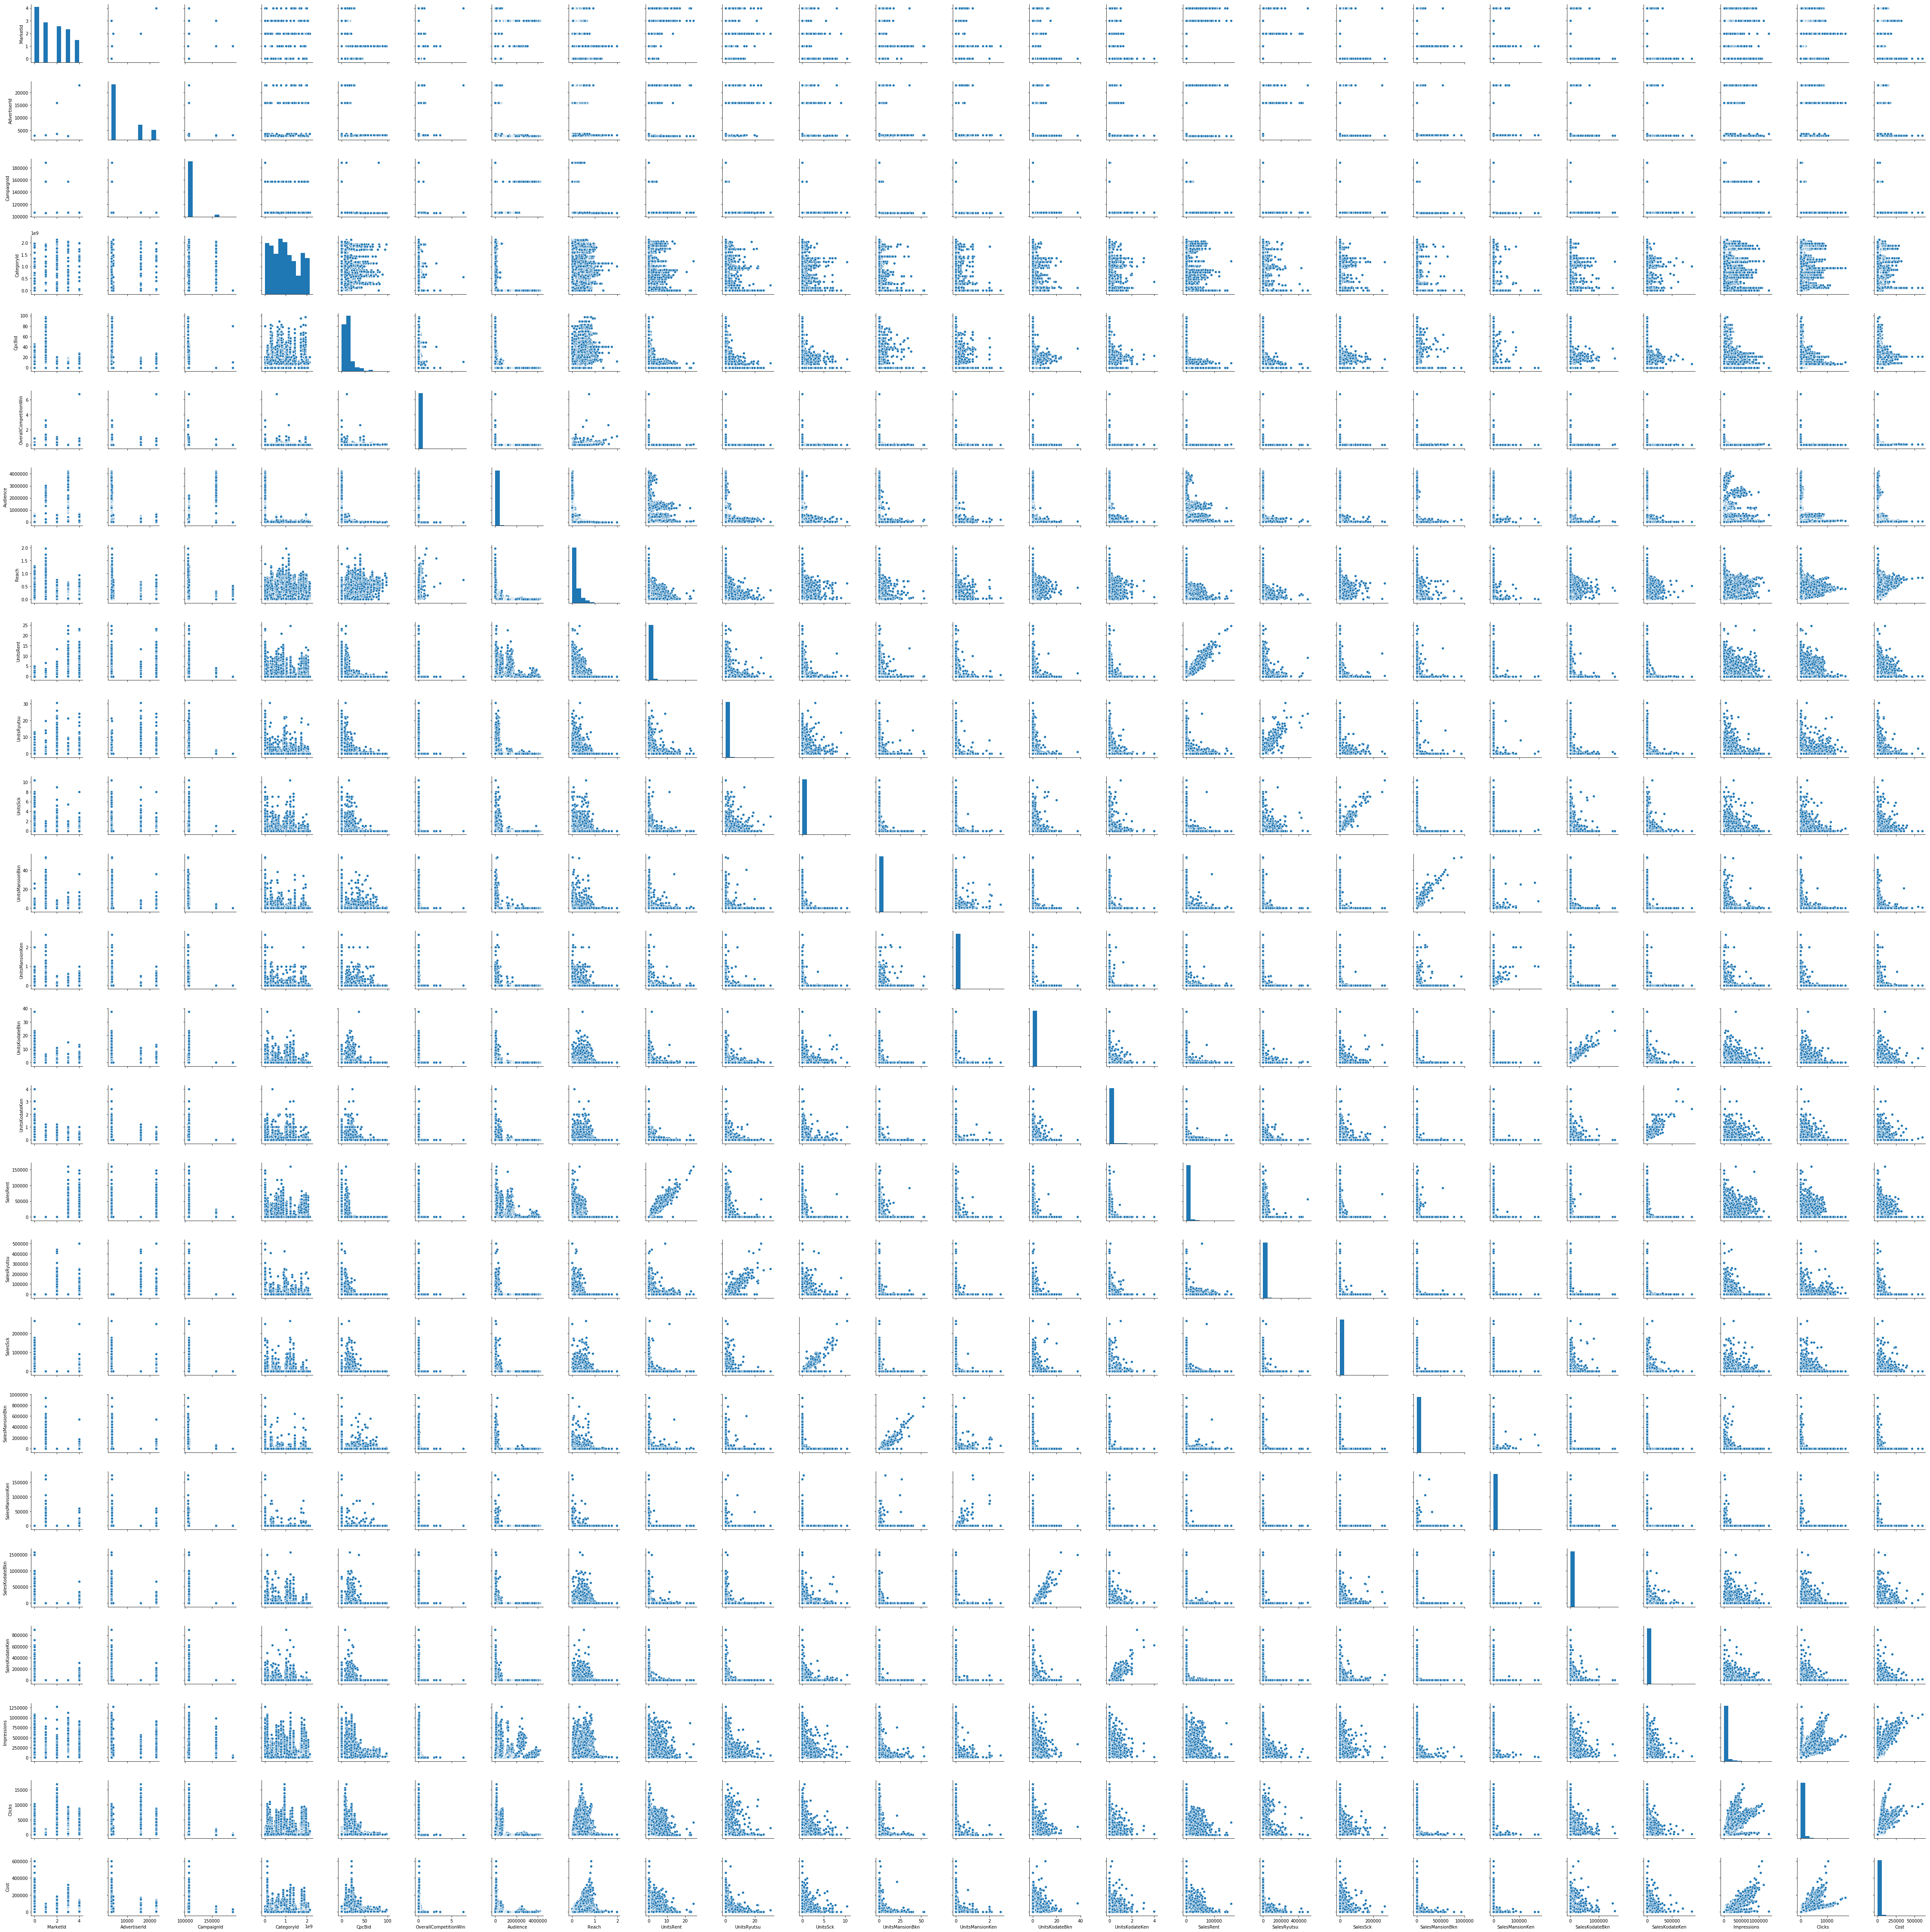

In [221]:
sns.pairplot(df)
plt.tight_layout()
#plt.savefig('./output/pair.png')
plt.show()

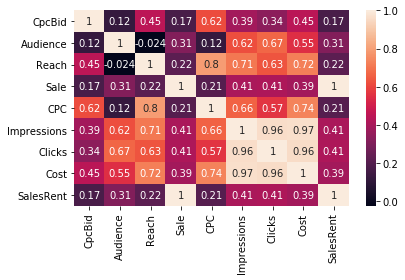

In [128]:
corr = df.corr()
sns.heatmap(corr, annot=True)

plt.tight_layout()
plt.savefig('./output/corr.png')
plt.show()

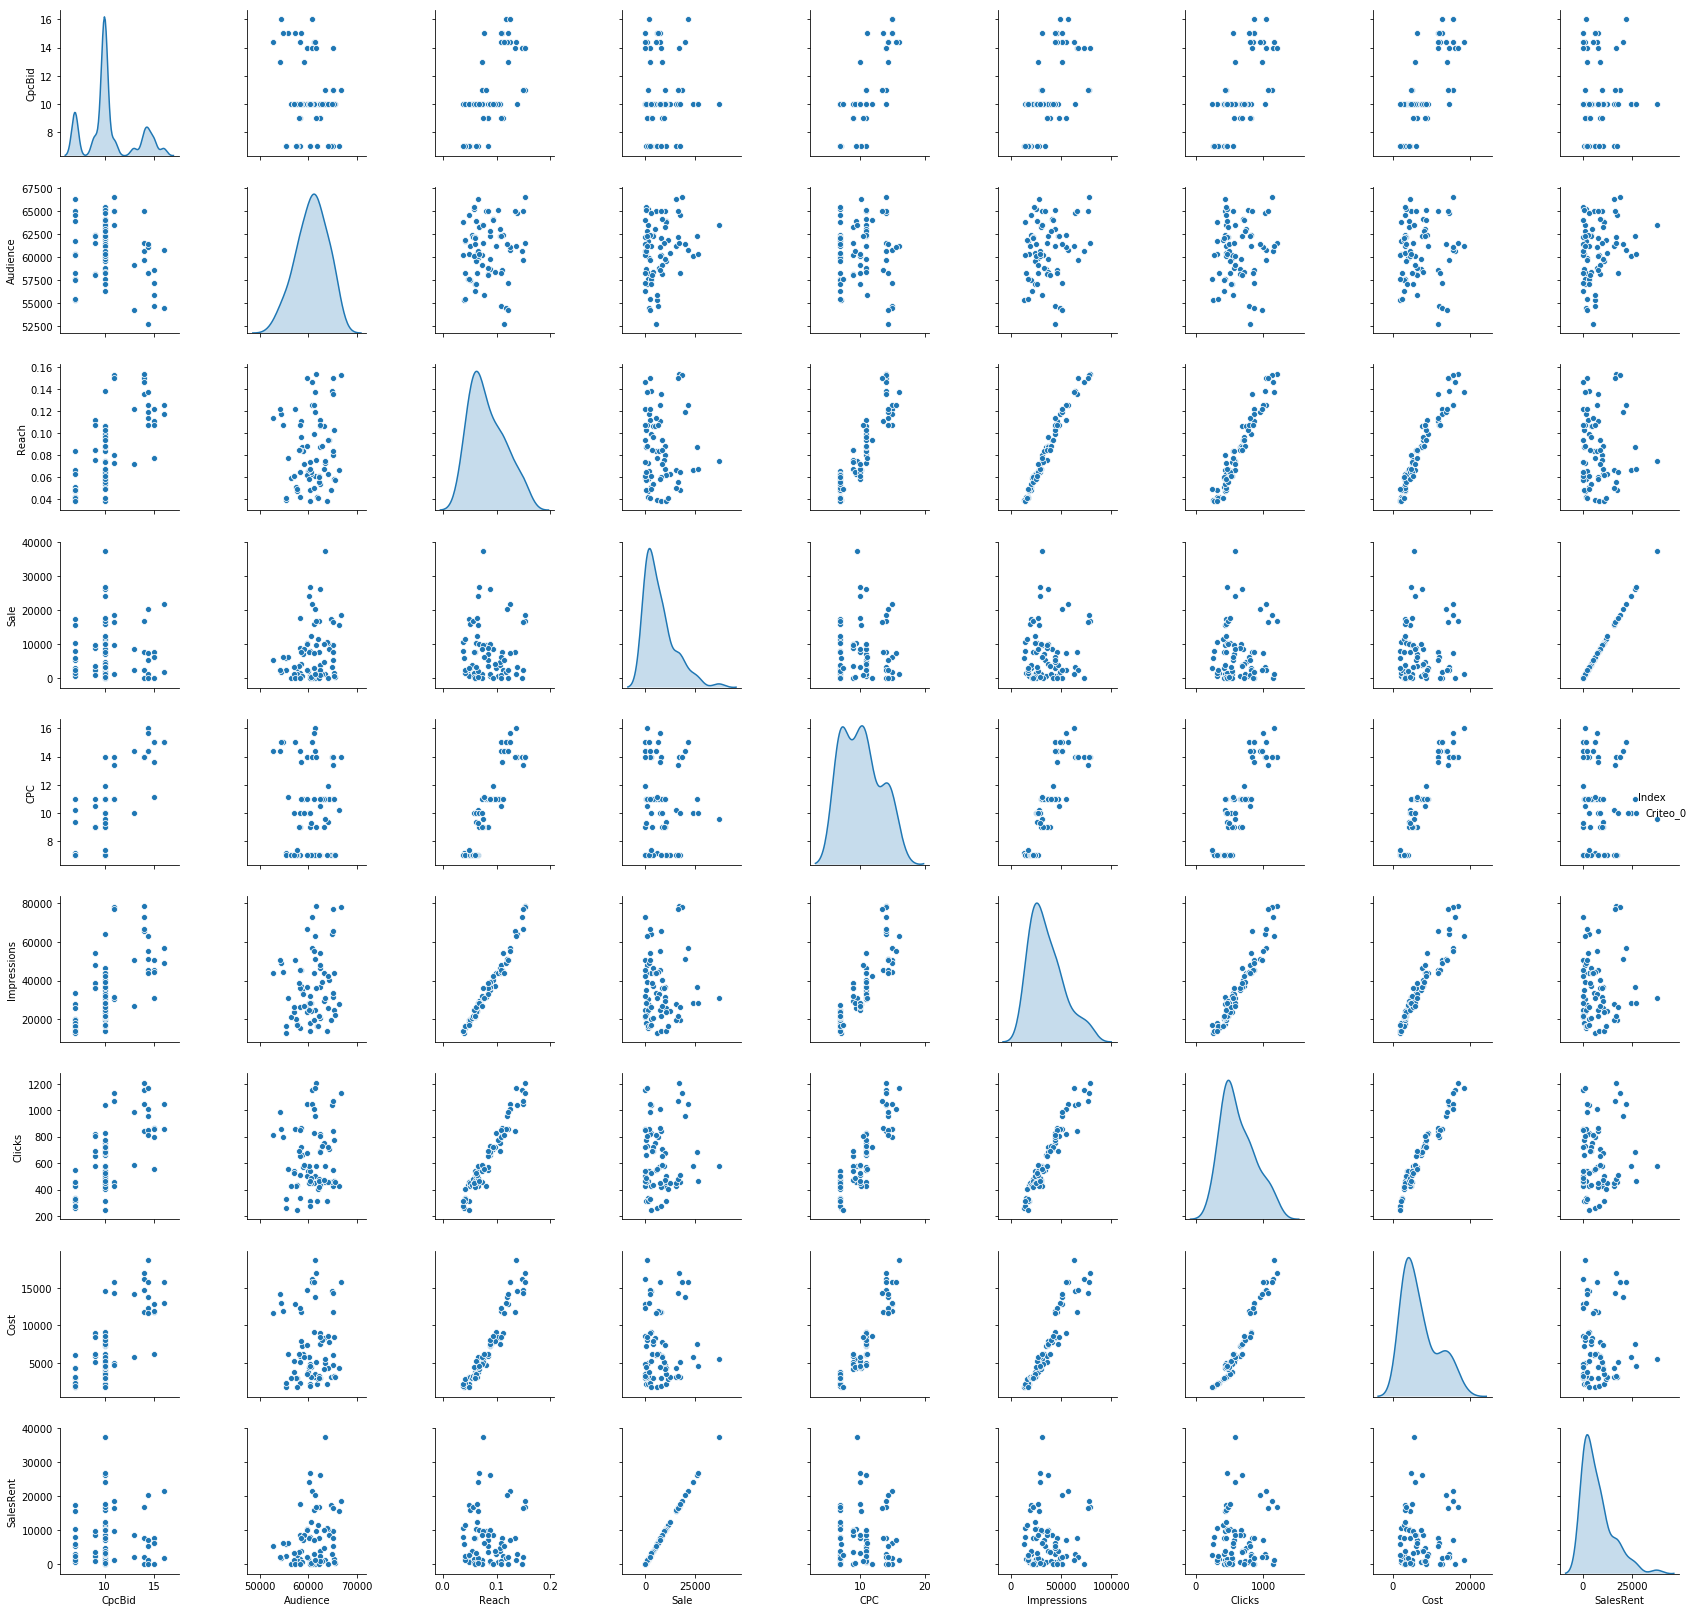

In [101]:
for g in df.groupby('Index'):
    
    sns.pairplot(g[1], hue='Index')
    plt.tight_layout()
    plt.savefig(f'./output/{g[0]}_{g[1].shape[0]}.png')
    plt.show()
    
    break

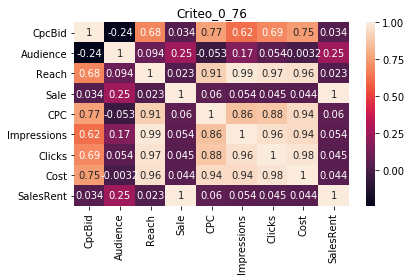

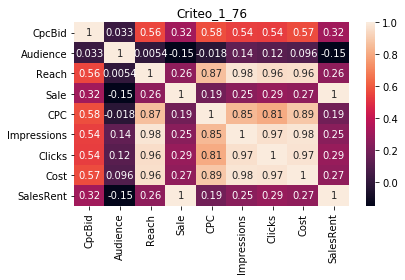

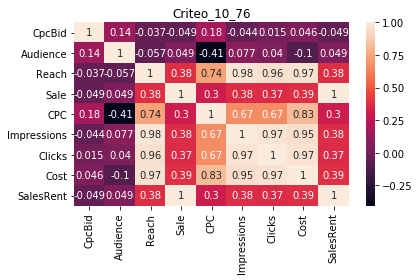

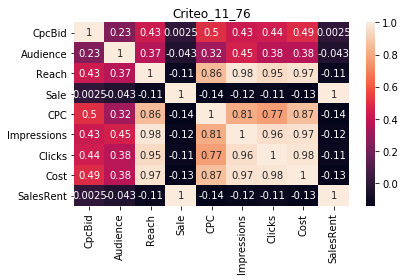

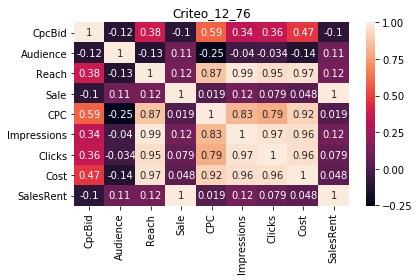

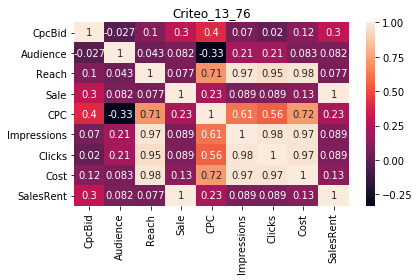

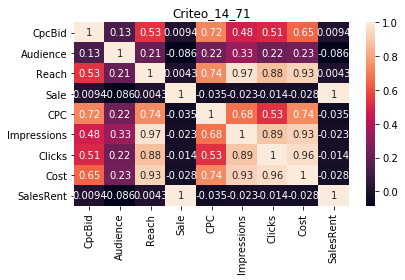

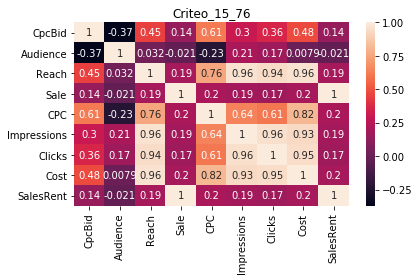

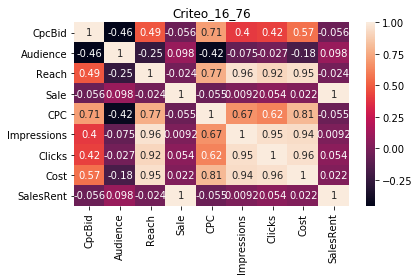

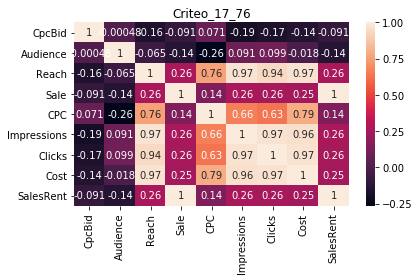

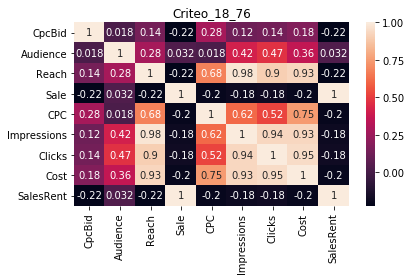

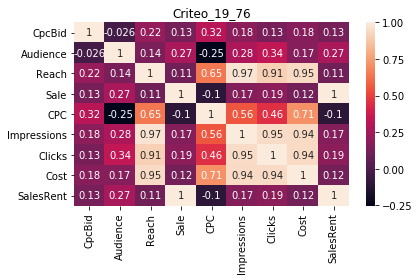

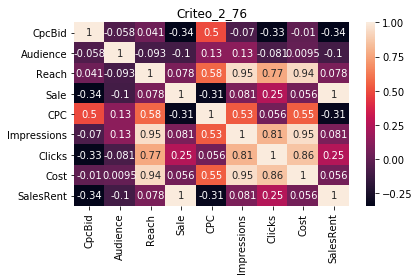

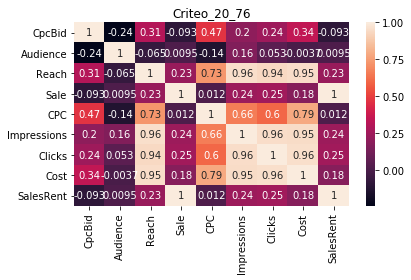

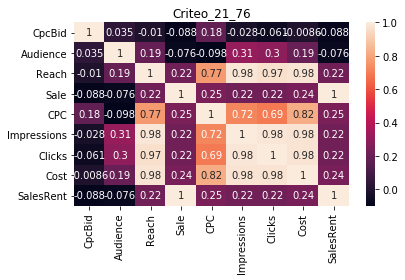

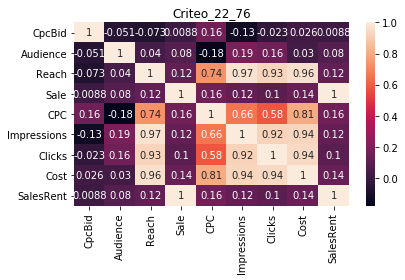

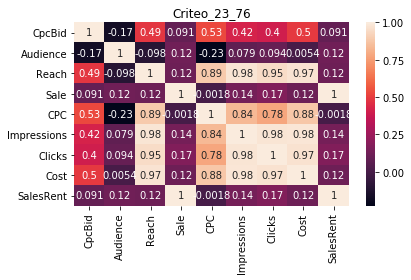

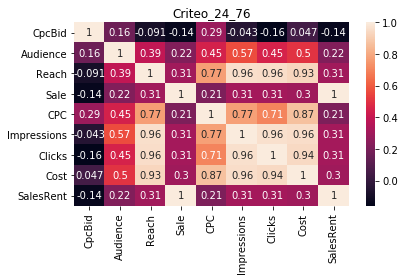

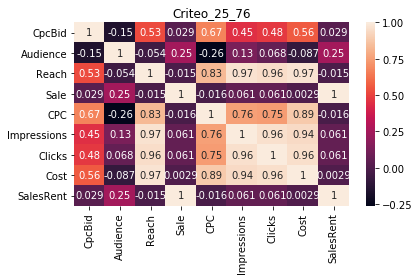

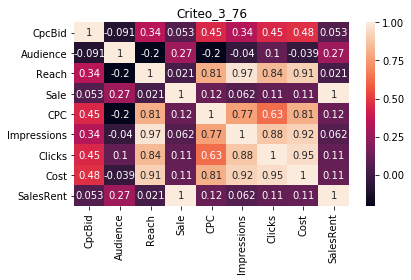

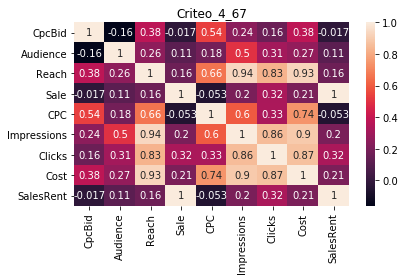

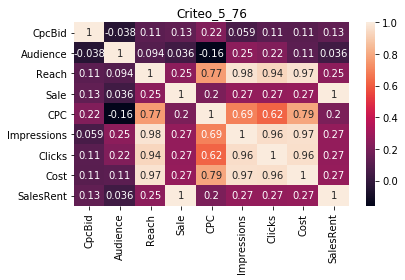

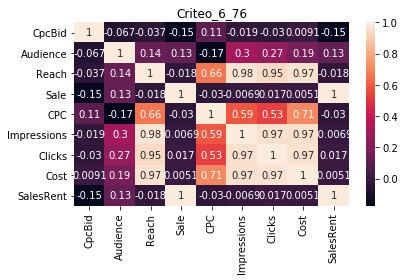

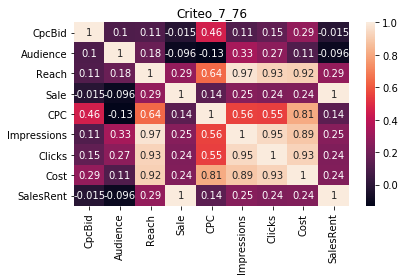

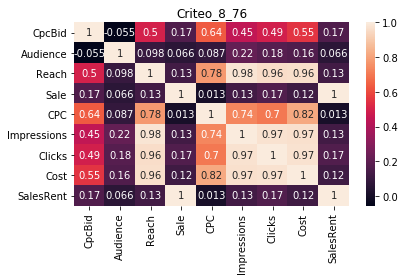

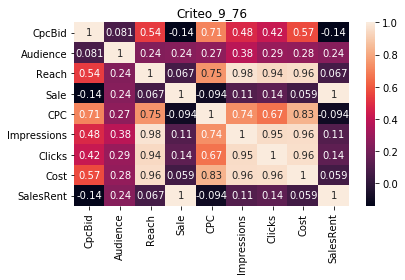

In [134]:
for g in df.groupby('Index'):
    
    corr = g[1].corr()
    sns.heatmap(corr, annot=True)
    
    plt.title(f'{g[0]}_{g[1].shape[0]}')
    plt.tight_layout()
    plt.savefig(f'./output/each/corr_{g[0]}_{g[1].shape[0]}.png')
    plt.show()
    
    #break

In [147]:
df.head()

Date  CpcBid      Audience     Reach      Index   CPC  Impressions  \
0 2019-09-17    11.0  63461.068436  0.072890   Criteo_0  11.0        30337   
1 2019-09-17     9.0  87902.952602  0.055272   Criteo_1   9.0        31220   
2 2019-09-17     7.0  88494.519816  0.032817  Criteo_10   7.0        16474   
3 2019-09-17    12.0  85339.906400  0.062408  Criteo_11  12.0        31731   
4 2019-09-17     7.0  95364.640552  0.032543  Criteo_12   7.0        18029   

   Clicks    Cost     SalesRent  
0     454  4994.0   1266.443922  
1     493  4437.0   8416.633585  
2     326  2282.0   3044.311156  
3     490  5880.0   2993.751301  
4     304  2128.0  21950.741321

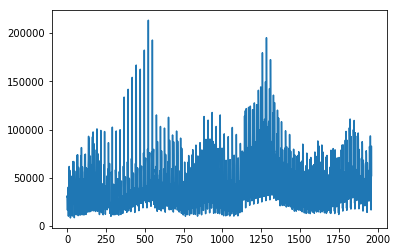

In [104]:
plt.plot(df['Impressions'])

In [185]:
f_output = './data/two_years_each/.xlsx'

with pd.ExcelWriter(f_output) as writer:
    print(g[0])
    for i, g in enumerate(groups):
        g[1].to_excel(writer, sheet_name='_'.join(str(x) for x in list(g[0])), index=0)
        print(g[0], g[1].shape)
        break
    writer.save()
    
    #break

('ryutsu', 15912, 106516, 2046868865)
('honten', 22864, 106511, 0) (690, 29)


In [203]:
for i, g in enumerate(groups):
    sn = '_'.join(str(x) for x in list(g[0]))
    with pd.ExcelWriter(f'./data/two_years_each/{sn}_{g[1].shape[0]}.xlsx') as writer:
        g[1].to_excel(writer, sheet_name=sn, index=0)
        print(g[0], g[1].shape)
        writer.save()
    #break

(0, 2914, 106509, -1) (76, 30)
(0, 2914, 106509, 0) (699, 30)
(0, 2914, 106509, 103157776) (699, 30)
(0, 2914, 106509, 122129909) (699, 30)
(0, 2914, 106509, 145781276) (699, 30)
(0, 2914, 106509, 288936217) (699, 30)
(0, 2914, 106509, 360278056) (699, 30)
(0, 2914, 106509, 393836642) (699, 30)
(0, 2914, 106509, 501309237) (699, 30)
(0, 2914, 106509, 647500945) (699, 30)
(0, 2914, 106509, 710057733) (699, 30)
(0, 2914, 106509, 739735262) (699, 30)
(0, 2914, 106509, 967178013) (699, 30)
(0, 2914, 106509, 1007552764) (699, 30)
(0, 2914, 106509, 1007561482) (699, 30)
(0, 2914, 106509, 1014680751) (699, 30)
(0, 2914, 106509, 1048444253) (699, 30)
(0, 2914, 106509, 1108209194) (699, 30)
(0, 2914, 106509, 1191599194) (699, 30)
(0, 2914, 106509, 1209301505) (699, 30)
(0, 2914, 106509, 1331496998) (699, 30)
(0, 2914, 106509, 1363706990) (699, 30)
(0, 2914, 106509, 1600325479) (699, 30)
(0, 2914, 106509, 1816201462) (699, 30)
(0, 2914, 106509, 1884256507) (699, 30)
(0, 2914, 106509, 1970606947)

(3, 2773, 106513, 1941993914) (699, 30)
(3, 2773, 106513, 2044194994) (699, 30)
(3, 2773, 106513, 2064083645) (699, 30)
(3, 2773, 157502, -1) (94, 30)
(3, 2773, 157502, 0) (93, 30)
(3, 2773, 157502, 123850463) (95, 30)
(3, 2773, 157502, 269984294) (96, 30)
(3, 2773, 157502, 307427601) (94, 30)
(3, 2773, 157502, 357413589) (95, 30)
(3, 2773, 157502, 357928842) (94, 30)
(3, 2773, 157502, 477150441) (95, 30)
(3, 2773, 157502, 587672534) (94, 30)
(3, 2773, 157502, 647396435) (94, 30)
(3, 2773, 157502, 739735262) (94, 30)
(3, 2773, 157502, 785101548) (96, 30)
(3, 2773, 157502, 800963742) (95, 30)
(3, 2773, 157502, 857412276) (94, 30)
(3, 2773, 157502, 874499868) (99, 30)
(3, 2773, 157502, 1007102019) (94, 30)
(3, 2773, 157502, 1033218918) (95, 30)
(3, 2773, 157502, 1220910636) (95, 30)
(3, 2773, 157502, 1600325479) (95, 30)
(3, 2773, 157502, 1652289276) (94, 30)
(3, 2773, 157502, 1714381509) (93, 30)
(3, 2773, 157502, 1749236875) (96, 30)
(3, 2773, 157502, 1881376968) (97, 30)
(3, 2773, 157

In [210]:
def pair_each(f_name):
    df = pd.read_excel(f'./data/two_years_each/{f_name}.xlsx', header=0)
    df.fillna(0, inplace=True)
    sns.pairplot(df, hue='Market')
    plt.tight_layout()
    plt.savefig(f'./output/two_years_each/{g[0]}_{g[1].shape[0]}.png')
    plt.show()

C:\Users\dushu\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\dushu\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


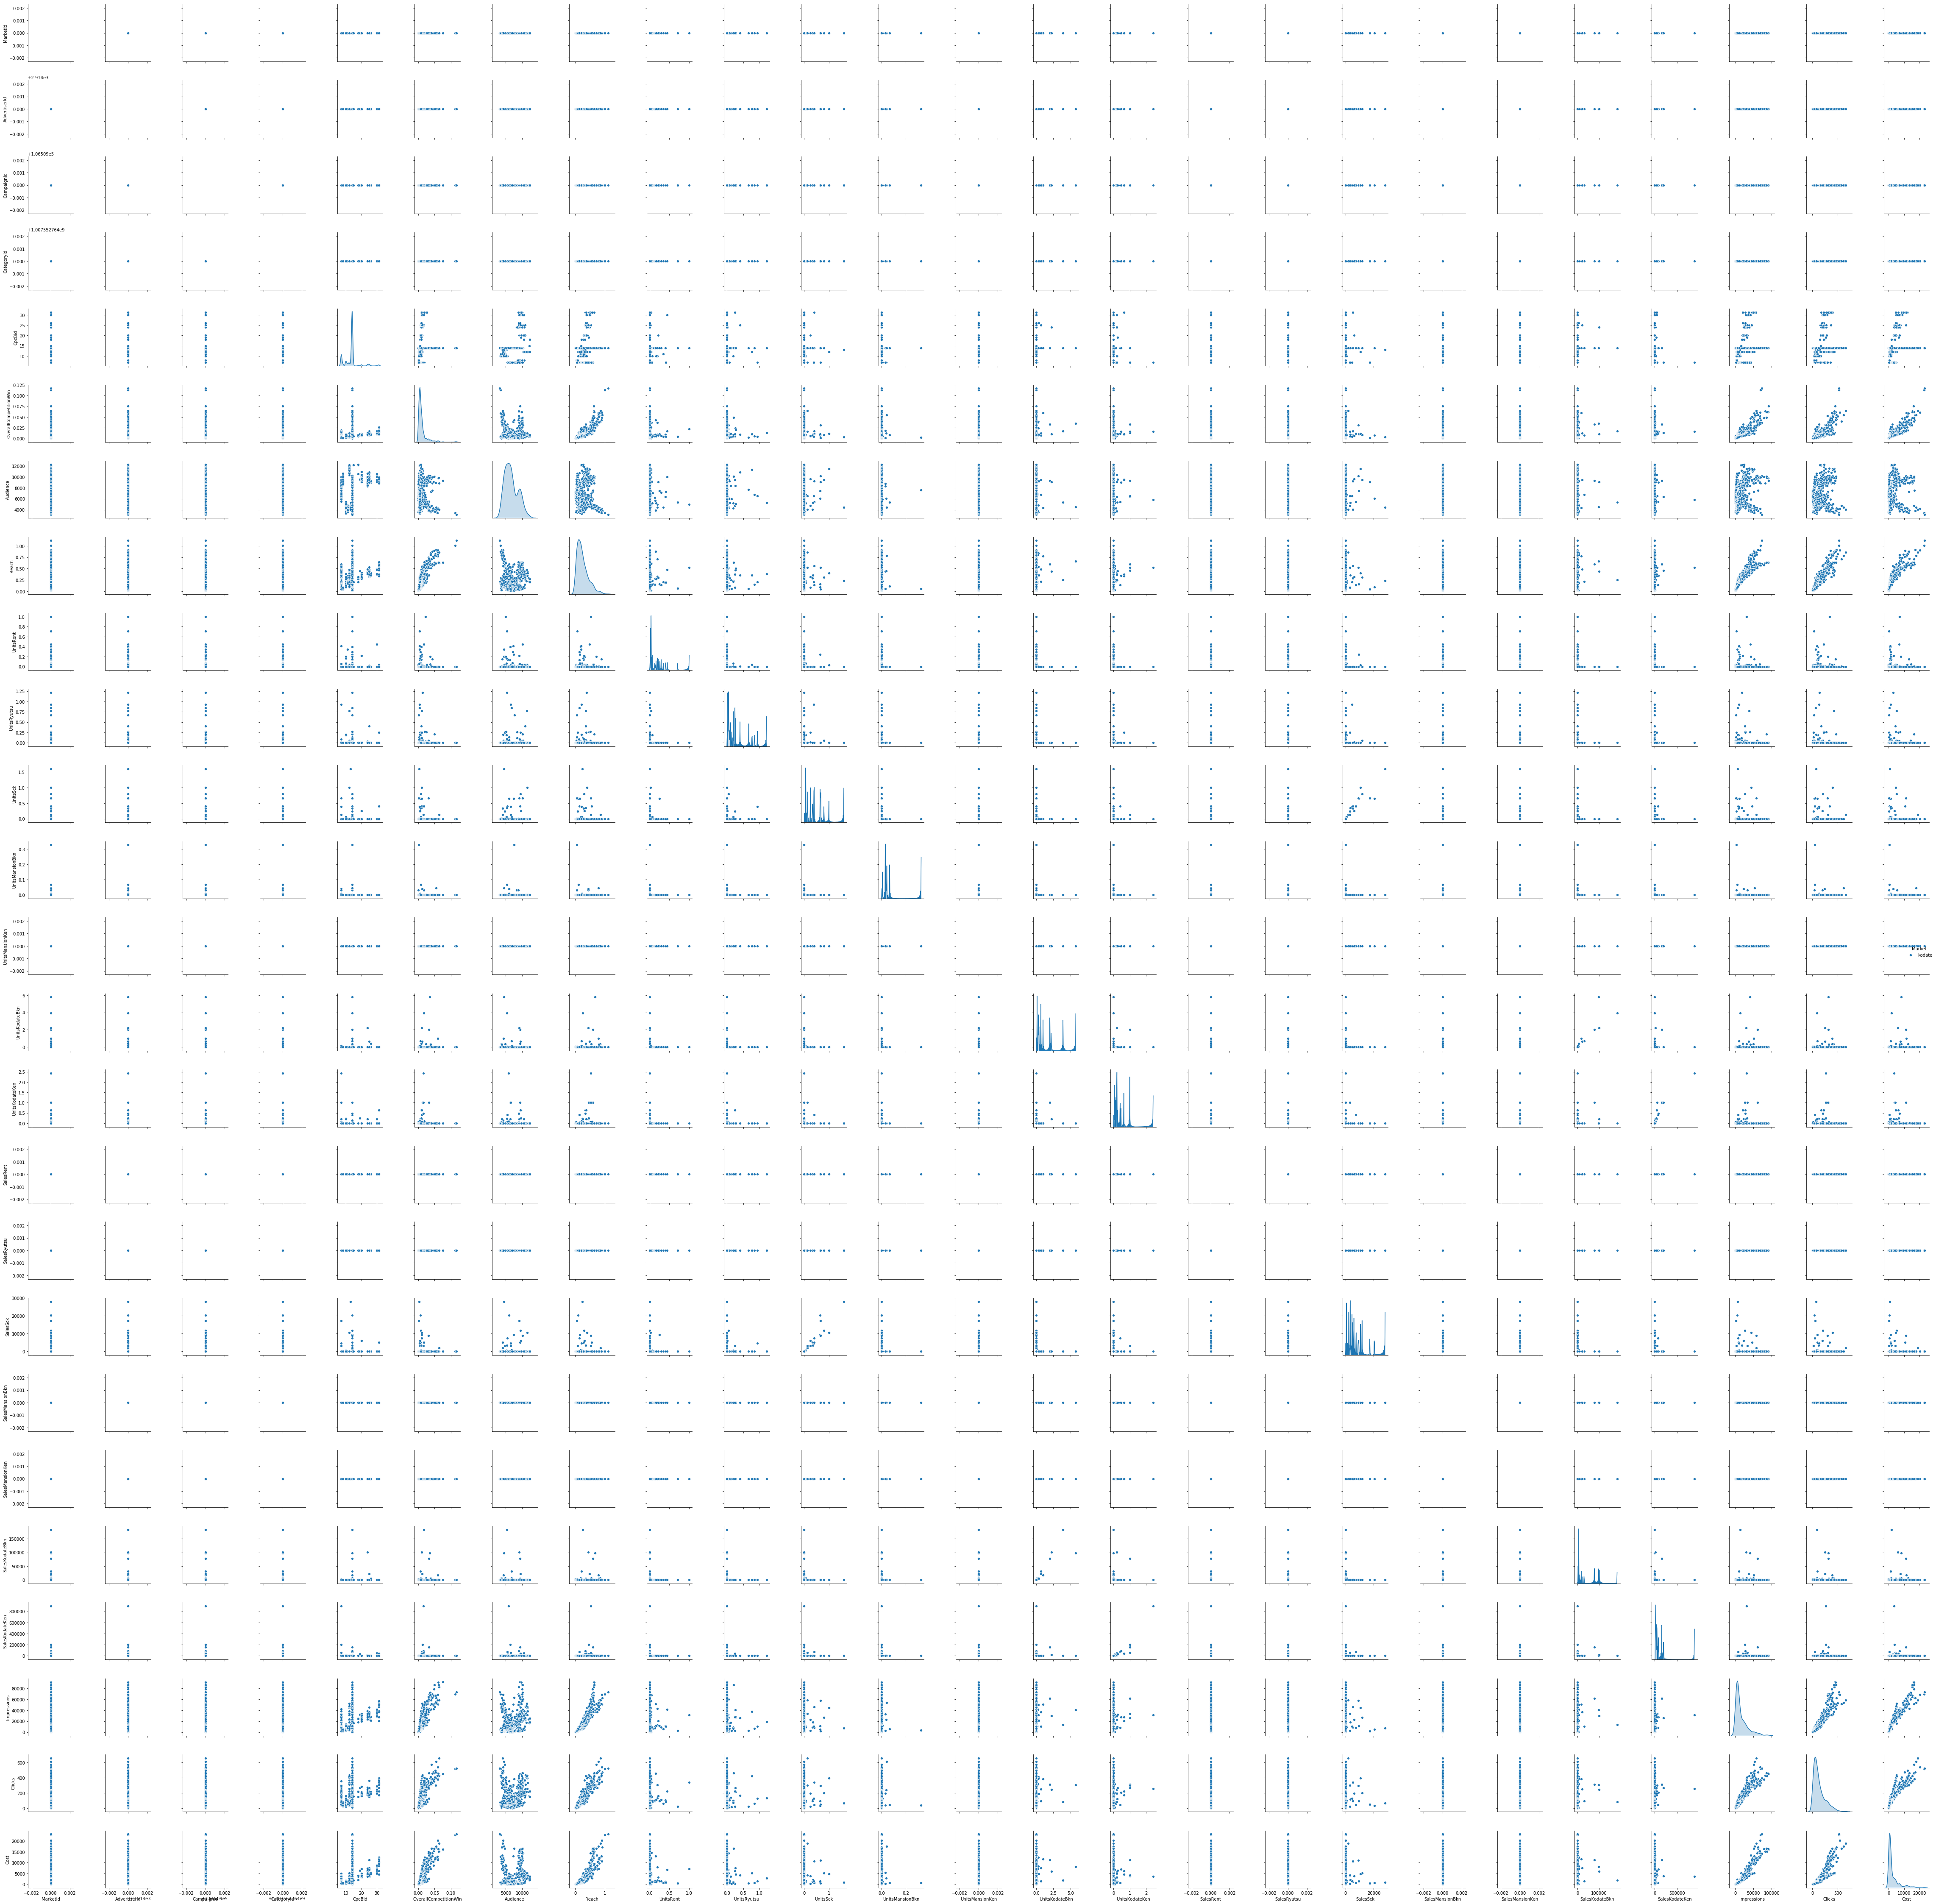

In [211]:
pair_each('0_2914_106509_1007552764_699')